In [1]:
import urllib.request
import json
import os
from time import gmtime, strftime
from IPython.display import clear_output
import time
from datetime import timedelta
import sklearn
import numpy as np
import pandas as pd
import xgboost as xgb
import datetime
from time import sleep
import matplotlib.pyplot as plt

In [2]:
def preprocess_data(dataframe):


    dataframe = dataframe.dropna() # drop missing values
    y = dataframe.iloc[:, 1]  # Get label column 
    y = y.values

    dataframe = dataframe.drop(columns='label') # Drop the label column
    X = dataframe.values

    return X, y

def bootstrap_model(dataframe):

    X_train, y_train = preprocess_data(dataframe)

    my_params = {'objective':'reg:squarederror', 'verbose':False, 'n_estimators': 500, 'max_depth': 4}

    model = xgb.XGBRegressor(**my_params)

    model.fit(X_train, y_train)

    model.save_model('btc_model.model')


def predict_price(avg_score, prev_close, rolling_avg_val):
    x_test = list((avg_score, prev_close, rolling_avg_val))
    model = xgb.XGBRegressor()
    model.load_model('btc_model.model')
    pred_price = model.predict(x_test)
    return pred_price.tolist()[0]


def retrain_model(avg_score, prev_close, rolling_avg_val, y_train_sample):
    x_train_sample = list((avg_score, prev_close, rolling_avg_val))
    x_train_sample = np.array(x_train_sample)    
    x_train_sample = x_train_sample.reshape(1,3)
    model = xgb.XGBRegressor()

    model.fit(x_train_sample, np.array(y_train_sample).reshape(1,1), xgb_model = 'btc_model.model')
    model.save_model('btc_model.model')


In [74]:
import requests
import pandas as pd
list_of_cryptos = pd.read_csv("listcrypto.csv").drop(columns=['Unnamed: 0']).values.T.flatten()

def plot_volume(list_of_cryptos):
    for symbol in list_of_cryptos:
        try:
            symbol = symbol
            exchange = 'USD'
            start_date = '2020-08-08'
            AV_API_KEY = "COQ9LPN0Z8CC5Z8C";
            api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={AV_API_KEY}'
            raw_df = requests.get(api_url).json()
            df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
            df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'label', '5. volume': 'volume'})
            df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
            for i in df.columns:
                df[i] = df[i].astype(float)
            df.index = pd.to_datetime(df.index)
            plt.title(symbol)
            plt.plot(df['volume'])
            plt.savefig("C:/Users/thanh/Downloads/Crypto/volume_plots/{0}.png".format(symbol))
        except KeyError: 
            print("{0} is not in the database".format(symbol))

USDT is not in the database
USDC is not in the database
SOL is not in the database
ADA is not in the database
XRP is not in the database
DOT is not in the database
LUNA is not in the database
AVAX is not in the database
DOGE is not in the database
SHIB is not in the database
MATIC is not in the database
BUSD is not in the database
LINK is not in the database
CRO is not in the database
WBTC is not in the database
UST is not in the database
ATOM is not in the database
LTC is not in the database
DAI is not in the database
ALGO is not in the database
NEAR is not in the database
BCH is not in the database
UNI is not in the database
ICP is not in the database
TRX is not in the database
XLM is not in the database
OKB is not in the database
FTM is not in the database
STETH is not in the database
FTT is not in the database
VET is not in the database
HBAR is not in the database
AXS is not in the database
MIM is not in the database
CETH is not in the database
FIL is not in the database
SAND is no

KeyboardInterrupt: 

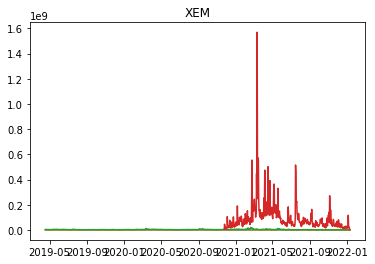

In [75]:
plot_volume(list_of_cryptos)

In [77]:
symbol = "SHIB"
exchange = 'USD'
start_date = '2020-08-08'
AV_API_KEY = "COQ9LPN0Z8CC5Z8C";
api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={AV_API_KEY}'
raw_df = requests.get(api_url).json()
df = pd.DataFrame(raw_df).T
df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'label', '5. volume': 'volume'})
df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
for i in df.columns:
    df[i] = df[i].astype(float)
df.index = pd.to_datetime(df.index)

ValueError: If using all scalar values, you must pass an index

In [78]:
raw_df

{'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'}

In [6]:
bootstrap_model(data_train)

[14:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [7]:

x_test,y_test = preprocess_data(data_test)
x_test

array([[10158.75    , 10448.81    , 10040.      , 34511.162755],
       [10415.01    , 10439.      , 10153.      , 30280.339776],
       [10344.13    , 10419.99    , 10222.33    , 23621.533519],
       ...,
       [43451.14    , 43816.      , 42430.58    , 38880.37305 ],
       [43082.3     , 43145.83    , 40610.      , 54836.50818 ],
       [41566.48    , 41833.21    , 41558.      ,   625.34627 ]])

In [8]:
model = xgb.XGBRegressor()
model.load_model('btc_model.model')
pred_price = model.predict(x_test)

In [9]:
pred_price

array([10466.626 , 10485.509 , 10490.844 , 10320.582 , 10317.491 ,
       10317.185 , 10332.291 , 10281.036 , 10330.276 , 10324.232 ,
        9916.34  ,  9940.694 ,  9797.537 ,  8843.467 ,  8384.757 ,
        8242.438 ,  8295.662 ,  8359.938 ,  8250.082 ,  8593.972 ,
        8530.748 ,  8418.418 ,  8366.685 ,  8224.05  ,  8137.7666,
        8219.537 ,  8291.266 ,  8519.988 ,  8649.485 ,  8909.148 ,
        8498.367 ,  8519.644 ,  8525.518 ,  8450.514 ,  8236.834 ,
        8101.4146,  8085.4727,  8097.0806,  8240.545 ,  8467.516 ,
        8343.8545,  8103.965 ,  7586.0303,  8685.003 , 10017.538 ,
        9854.027 ,  9908.292 ,  9781.81  ,  9344.527 ,  9355.843 ,
        9345.652 ,  9178.69  ,  9221.27  ,  9279.186 ,  9294.409 ,
        9136.487 ,  9376.361 ,  9306.065 ,  8833.434 ,  9200.165 ,
        9322.905 ,  8945.135 ,  9116.704 ,  8807.795 ,  8939.511 ,
        8509.614 ,  8564.713 ,  8387.573 ,  8215.268 ,  8341.914 ,
        8069.364 ,  7866.546 ,  7595.9624,  7621.581 ,  7585.5

In [10]:
x = data.index
a = data['label']
vol = data['volume']
pred = pred_price

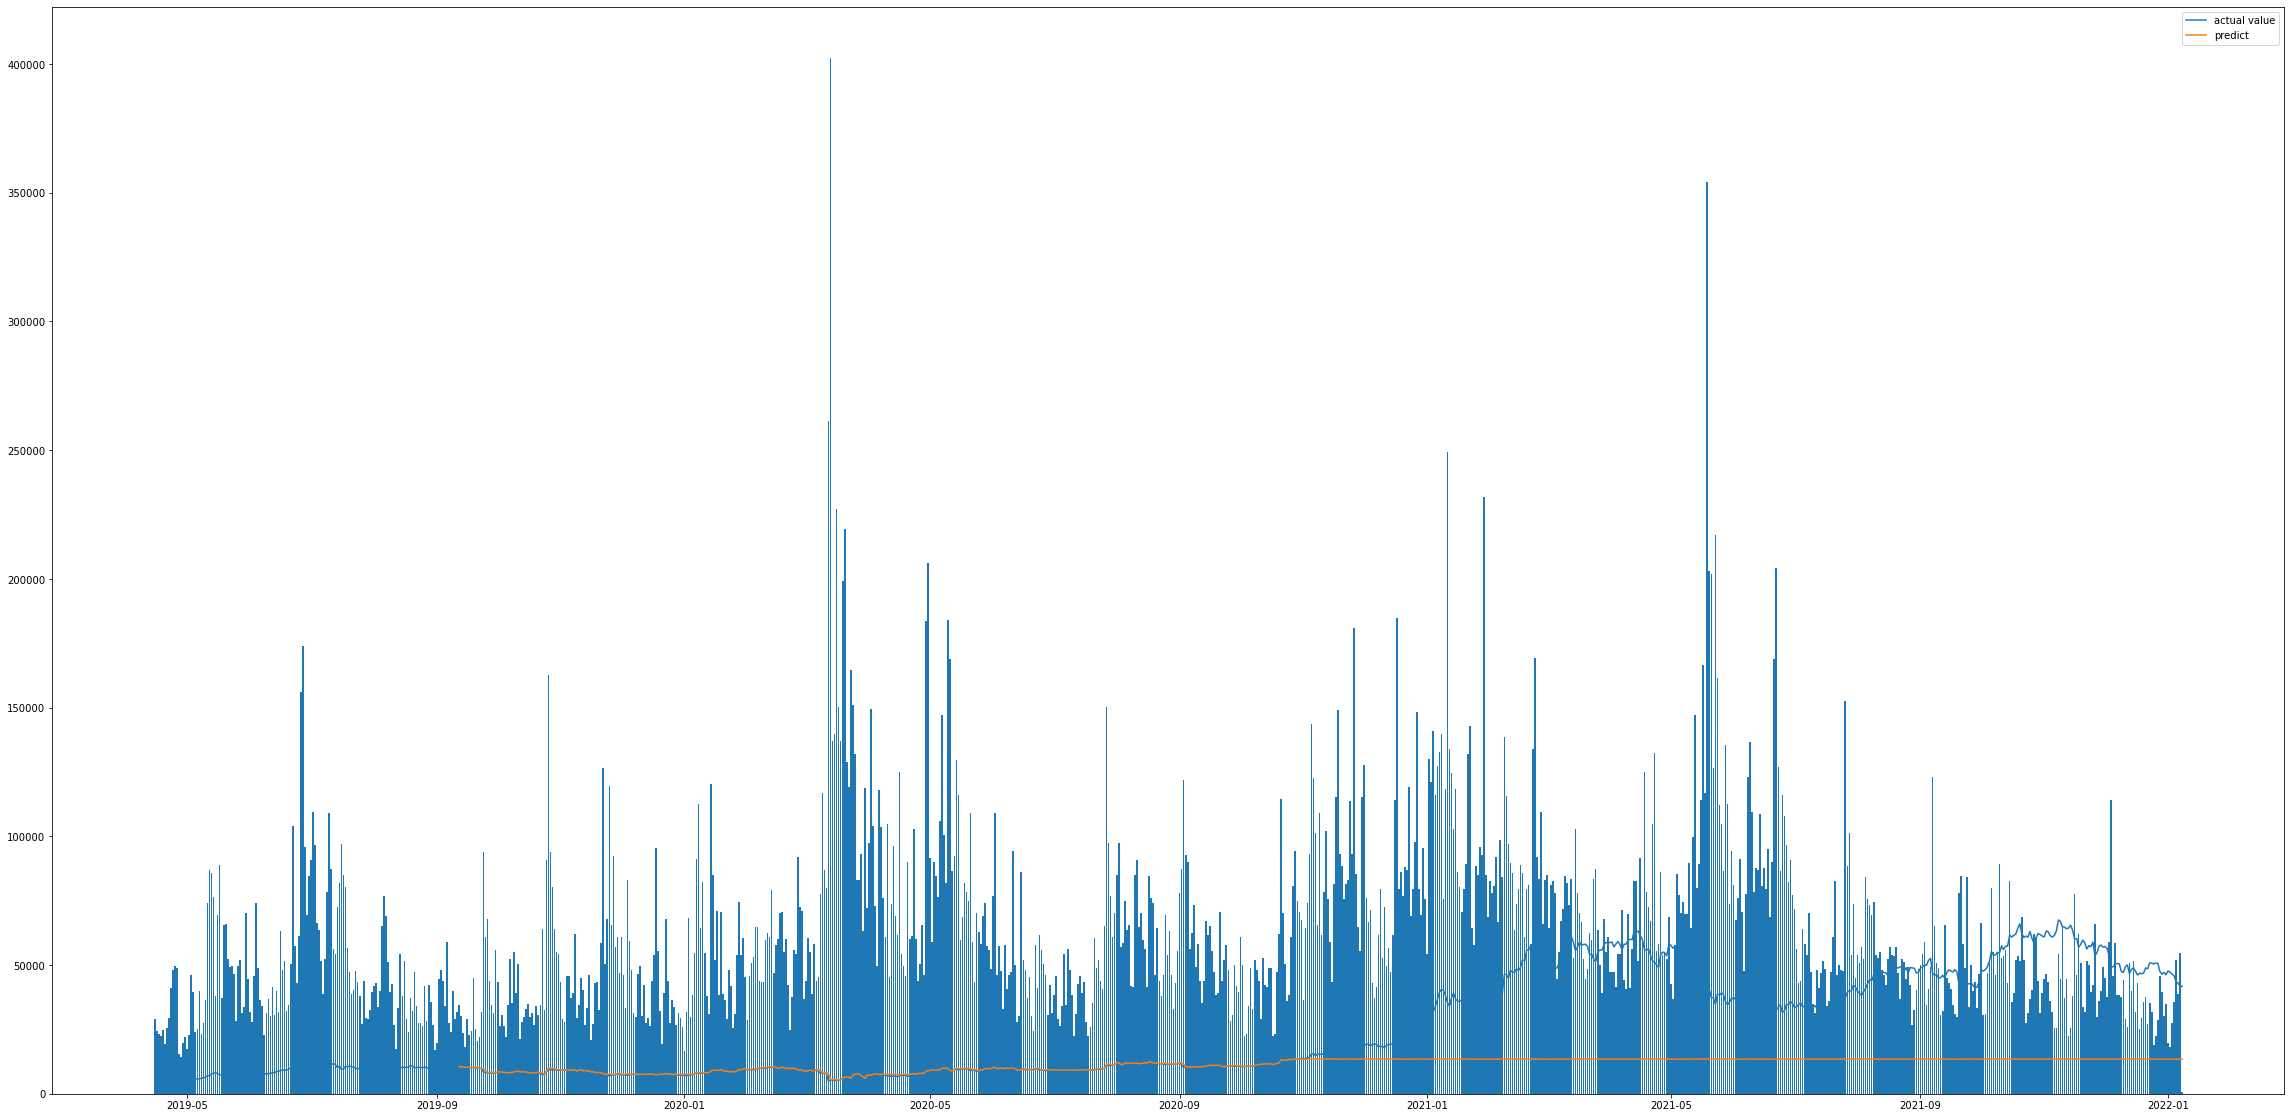

In [11]:
plt.figure(figsize=(40,20))
plt.plot(x,a,label="actual value")
plt.bar(x,vol)
plt.plot(x[150:],pred,label="predict")
plt.legend()

In [12]:
data.iloc[300:,:]

,open,high,low,label,volume
2020-02-09,9895.04,10166.00,9880.75,10151.75,43408.475616
2020-02-10,10151.72,10188.00,9756.00,9851.83,59573.084619
2020-02-11,9851.74,10323.59,9700.00,10223.08,62422.395224
2020-02-12,10223.08,10450.00,10223.08,10326.46,61008.063930
2020-02-13,10325.33,10500.00,10080.00,10229.63,79344.358759
...,...,...,...,...,...
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.413600
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.118570
2022-01-06,43451.14,43816.00,42430.58,43082.31,38880.373050
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180


In [47]:
import numpy as np 
import html5lib
import pandas as pd 
import yfinance as yf
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
driver = webdriver.Chrome(ChromeDriverManager().install())


# driver.get("https://finance.yahoo.com/cryptocurrencies/")
driver.get("https://www.coingecko.com/en/coins/all")
# driver.get("https://finance.yahoo.com/world-indices/")
html = driver.page_source

tables = pd.read_html(html)
data = tables[0]

driver.close()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\thanh\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache
C:\Users\thanh\AppData\Local\Temp/ipykernel_8532/2062761977.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [54]:
# tickerData = yf.Ticker('BNB-USD')
# tables[0]['Symbol'].to_csv('listcrypto.csv')

In [43]:
tables[2]['Symbol']['']

0       BTC
1       ETH
2      USDT
3       BNB
4       SOL
       ... 
195     NaN
196     NaN
197     NaN
198     NaN
199     NaN
Name: Symbol, Length: 200, dtype: object

In [23]:
tickerData.history(period='1d', start='2020-1-1', end='2022-1-1')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,13.952087,14.095331,13.648682,13.727642,166278254,0,0
2020-01-01,13.730962,13.873946,13.654942,13.689083,172980718,0,0
2020-01-02,13.698126,13.715548,12.989974,13.027011,156376427,0,0
2020-01-03,13.035329,13.763709,13.012638,13.660452,173683857,0,0
2020-01-04,13.667442,13.921914,13.560008,13.891512,182230374,0,0
...,...,...,...,...,...,...,...
2021-12-27,546.507874,571.548889,543.506348,562.641479,2180356553,0,0
2021-12-28,563.590332,563.590332,530.059937,534.928040,2791585162,0,0
2021-12-29,534.850037,540.615784,511.745331,514.000793,2159325741,0,0


!pip install webdriver-manager

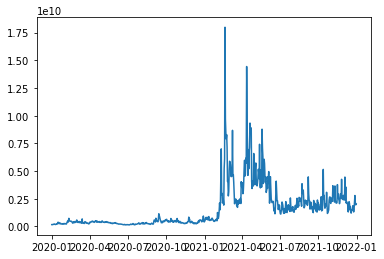

In [24]:
plt.plot(tickerData.history(period='1d', start='2020-1-1', end='2022-1-1')['Volume'])


In [26]:
pd.read_csv(btc_data)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,17/07/2010,0.0495,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,0.000010,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,18/07/2010,0.0726,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.620000e+03,0.000243,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,19/07/2010,0.0859,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.048000e+03,0.000022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,20/07/2010,0.0783,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,21/07/2010,0.0767,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,29/01/2020,9349.0000,340402,706867.000,433958,1.546610e+13,1.160000e+20,0.163,8.336367e+09,0.561000,...,93.577,80.644,73.588,64.882,54.040,10.430,7.538,6.497,26.536,1.663
3484,30/01/2020,9394.0000,332402,704883.000,416980,1.546610e+13,1.250000e+20,0.148,1.365361e+10,0.555000,...,94.137,81.436,74.176,65.272,54.195,7.432,10.930,8.061,28.817,2.376
3485,31/01/2020,9366.0000,334290,770486.000,398021,1.546610e+13,1.110000e+20,0.153,1.126273e+10,0.631000,...,87.140,79.116,73.100,64.815,54.082,3.505,11.368,5.611,29.412,0.800
3486,1/02/2020,9393.0000,303573,650769.000,338567,1.546610e+13,1.200000e+20,0.149,7.668679e+09,0.541000,...,88.385,79.762,73.498,65.058,54.175,0.473,12.499,5.457,31.791,1.606
